# SIT742: Modern Data Science 
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension (up to 3 days) no later than *12:00pm on 16/04/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Zhen Cai
- Student ID:   219056512
- Email:  caz@deakin.edu.au
- Lab Session and Tutor (for on campus students): Tue 02.00pm ZiWei Hou

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [2]:
# Import Package
from zipfile import ZipFile

# Load zipfile
z = ZipFile(r'HTWebLog_p1.zip')
file_names = z.namelist()

print("The number of files been loaded is : ", len(file_names))

The number of files been loaded is :  120


In [3]:
file_1 = z.read(file_names[0]).decode('iso-8859-1')    # Read file and change encoding type
file_1 = file_1.split("\r\n")                          # Split data row by row
columns_name = file_1[3]
columns_name = columns_name.split(" ")
columns_name = columns_name[1:16]
columns_name

['date',
 'time',
 's-sitename',
 's-ip',
 'cs-method',
 'cs-uri-stem',
 'cs-uri-query',
 's-port',
 'cs-username',
 'c-ip',
 'cs(User-Agent)',
 'cs(Referer)',
 'sc-status',
 'sc-substatus',
 'sc-win32-status']

In [4]:
column = columns_name
# Split the row data by space
new_file = list()
for i in file_1:
    new_file.append(i.split(" "))

# Print the test dataframe    
new_df = pd.DataFrame(new_file)

In [5]:
# Define function to remove rows with error information and create dataframe
def dataframe_construction(file_name, file_index):
    z = ZipFile(file_name, mode = 'r')
    file_names = z.namelist()
    df = z.read(file_names[file_index]).decode('iso-8859-1')
    df = df.split("\r\n")[4:]
    df_new = list()
    for i in df:
        df_new.append(i.split(" "))
    df_len = [item for item in df_new if len(item) == len(df_new[0])]   # Remove dirty item in list which len is not 15     
    df_data = pd.DataFrame(df_len) 
    return df_data


In [6]:
# Create data frame by for loop
dataframe = [dataframe_construction('HTWebLog_p1.zip', a) for a in range(len(file_names))]

In [7]:
# Combine dataframes
column = columns_name
df_ht = pd.concat(dataframe)
df_ht.columns = column
df_ht

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63741,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_green...,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
63742,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_recru...,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
63743,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/images/awards.jpg,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
63744,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/bottom.jpg,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


In [8]:
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438928 entries, 0 to 63745
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   date             object
 1   time             object
 2   s-sitename       object
 3   s-ip             object
 4   cs-method        object
 5   cs-uri-stem      object
 6   cs-uri-query     object
 7   s-port           object
 8   cs-username      object
 9   c-ip             object
 10  cs(User-Agent)   object
 11  cs(Referer)      object
 12  sc-status        object
 13  sc-substatus     object
 14  sc-win32-status  object
dtypes: object(15)
memory usage: 1.0+ GB


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [9]:
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


In [10]:
# Count NAs in columns

count_list_1 = list()     # List for record the number of missing value with -
count_list_NaN = list()    # List for record the number of missing value with NaN
count_list_None = list()    # List for record the number of missing value with None
for i in column:
    count_list_1.append(len(df_ht[df_ht[i] == '-']))
    count_list_NaN.append(len(df_ht[df_ht[i] == 'NaN']))
    count_list_None.append(len(df_ht[df_ht[i] == 'None']))


In [11]:
print("The Number of - in each column is:")
print(count_list_1)
print("-------------------------------------------------------------------")
print("The Number of NaN in each column is:")
print(count_list_NaN)
print("-------------------------------------------------------------------")
print("The Number of None in each column is:")
print(count_list_None)


The Number of - in each column is:
[0, 0, 0, 0, 0, 0, 7886532, 0, 8438928, 0, 3527, 1308994, 0, 0, 0]
-------------------------------------------------------------------
The Number of NaN in each column is:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------------------------------------------------------------------
The Number of None in each column is:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
# Count the percentage of missing values in each column
NAs_Per = list()
for i in count_list_1:
    NAs_Per.append(i/len(df_ht))

NAs_count = [f"{i:.5%}" for i in NAs_Per]
print(NAs_count)

Remove_Columns = list()
for i in NAs_Per:
    if i > 0.15:
        Remove_Columns.append(NAs_Per.index(i))
    else:
        continue

print(Remove_Columns)
print("Columns with missing values are:", Remove_Columns)
# Column 6, 8 and 11 has missing value more than 15% which need to be removed.

['0.00000%', '0.00000%', '0.00000%', '0.00000%', '0.00000%', '0.00000%', '93.45419%', '0.00000%', '100.00000%', '0.00000%', '0.04179%', '15.51138%', '0.00000%', '0.00000%', '0.00000%']
[6, 8, 11]
Columns with missing values are: [6, 8, 11]


In [14]:
# Remove column 6, 8 and 11
df_ht = df_ht.drop(df_ht.columns[Remove_Columns], axis = 1)
df_ht.head()


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [15]:
# Remove rows with missing values in column cs(User_Agent)
df_ht = df_ht[df_ht['cs(User-Agent)'] != '-'] # Only save rows without '-'
df_ht.head()


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,80,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [16]:
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8435401 entries, 0 to 63745
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   date             object
 1   time             object
 2   s-sitename       object
 3   s-ip             object
 4   cs-method        object
 5   cs-uri-stem      object
 6   s-port           object
 7   c-ip             object
 8   cs(User-Agent)   object
 9   sc-status        object
 10  sc-substatus     object
 11  sc-win32-status  object
dtypes: object(12)
memory usage: 836.6+ MB


## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


In [16]:
# Print out the time and split the hours, minutes and sec
time_data = df_ht['time']
time_data = pd.DataFrame(time_data)

time_data = time_data.time.str.split(":", expand = True)
time_data.columns = ["H", "M", "S"]
hour_data = time_data['H']
hour_data = pd.DataFrame(hour_data)
hour_data

,H
0,00
1,00
2,00
3,00
4,00
...,...
63741,23
63742,23
63743,23
63744,23


In [20]:
# Get the number of request in every hour
hourly_request = hour_data["H"].value_counts(ascending =False)
hourly_request

09    553564
08    550744
03    546655
06    544734
04    529352
07    522365
14    493695
05    487330
15    473057
10    443519
13    442429
02    432290
16    387291
11    368948
12    367635
01    344334
17    250285
18    159546
00    155914
19     93829
23     83634
20     72559
21     66474
22     65218
Name: H, dtype: int64

In [18]:
# Get the x value (00, 01, 02...22, 23)
labels = hourly_request.index

#### By day and plot 



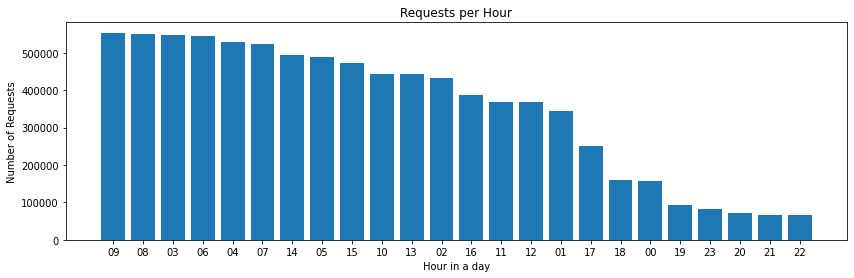

In [19]:
# Plot the hourly request in bar chart
plt.figure(figsize=(14,4))
plt.bar(labels, hourly_request, width=0.8)
plt.xticks(rotation=0)
plt.title('Requests per Hour')
plt.xlabel('Hour in a day')
plt.ylabel('Number of Requests')
plt.show()



<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [21]:
hourly_request_filter = hour_data[hour_data["H"].isin(hour_data["H"].value_counts()[(hour_data["H"].value_counts()>490000) | (hour_data["H"].value_counts()<400000)].index)]

In [22]:
hourly_request_filter["H"].value_counts()

09    553564
08    550744
03    546655
06    544734
04    529352
07    522365
14    493695
16    387291
11    368948
12    367635
01    344334
17    250285
18    159546
00    155914
19     93829
23     83634
20     72559
21     66474
22     65218
Name: H, dtype: int64

### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

In [17]:
server_data = df_ht["sc-status"]
server_data

0        200
1        200
2        200
3        200
4        200
        ... 
63741    200
63742    200
63743    200
63744    200
63745    200
Name: sc-status, Length: 8435401, dtype: object

In [18]:
# Count the server status
server_count = server_data.value_counts()
server_count

200    6072524
304    2136930
404     142583
206      72472
302       7366
500       2013
403        700
301        433
400        210
501        113
406         54
416          3
Name: sc-status, dtype: int64

In [28]:
# Get the list for data visulization
server_data = server_count.to_list()
server_data

[6072524, 2136930, 142583, 72472, 7366, 2013, 700, 433, 210, 113, 54, 3]

#### Server Status

In [29]:
# Get label and data for plot
label_pie = list(server_count.index)
data_pie = server_data

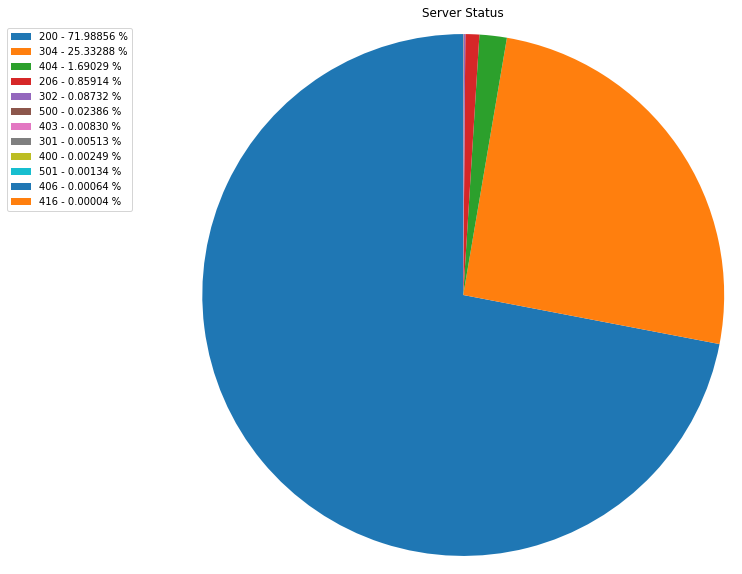

In [30]:
# Plot pie chart with lengend to avoid overlapping of labels
x = np.char.array(label_pie)
y = np.array(data_pie)
percent = 100.*y/y.sum()

plt.rcParams["figure.figsize"] = (15,10)

patches, texts = plt.pie(y, startangle=90, radius=1.2)  # Set the legend with percentage presented because the chart is overloop
labels = ['{0} - {1:1.5f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.title("Server Status")
plt.show()

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [ ]:
!pip install ip2geotools

In [31]:
# Import package
from ip2geotools.databases.noncommercial import DbIpCity

# Filter requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59
ip_data = df_ht[(df_ht.date == "2007-01-01")&((df_ht.time > "19:59:59") & (df_ht.time < "21:00:00"))]
ip_data

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status
28823,2007-01-01,20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
28824,2007-01-01,20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
28825,2007-01-01,20:01:12,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200,0,0
28826,2007-01-01,20:01:48,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200,0,0
28827,2007-01-01,20:01:57,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29032,2007-01-01,20:52:46,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.85.161,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404,0,2
29033,2007-01-01,20:52:48,W3SVC1,127.0.0.1,GET,/Tulip/dining/zh-hk/dining_cafeserena.aspx,80,74.6.85.206,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,200,0,0
29034,2007-01-01,20:59:04,W3SVC1,127.0.0.1,GET,/Tulip/whatsnew/whatsnew_roomsdetail.aspx,80,202.160.178.181,Mozilla/5.0+(compatible;+Yahoo!+Slurp+China;+h...,200,0,0
29035,2007-01-01,20:59:40,W3SVC1,127.0.0.1,GET,/robots.txt,80,74.6.75.47,Mozilla/5.0+(compatible;+Yahoo!+Slurp;+http://...,404,0,2


In [33]:
# Get the client_ip cloumn
client_ip = ip_data["c-ip"].to_list()

# Using for loop to get the region of the ip in a list
country_list = list()
for ip_address in client_ip:
    country_list.append(DbIpCity.get(ip_address, api_key = 'free').country)



In [34]:
len(country_list)

214

In [35]:
# Count the value of each country/region
country_data = pd.DataFrame(country_list, columns = ["Regions"])
counrty_counts = country_data["Regions"].value_counts()
counrty_counts

HK    169
CN     25
US     16
IT      3
AU      1
Name: Regions, dtype: int64

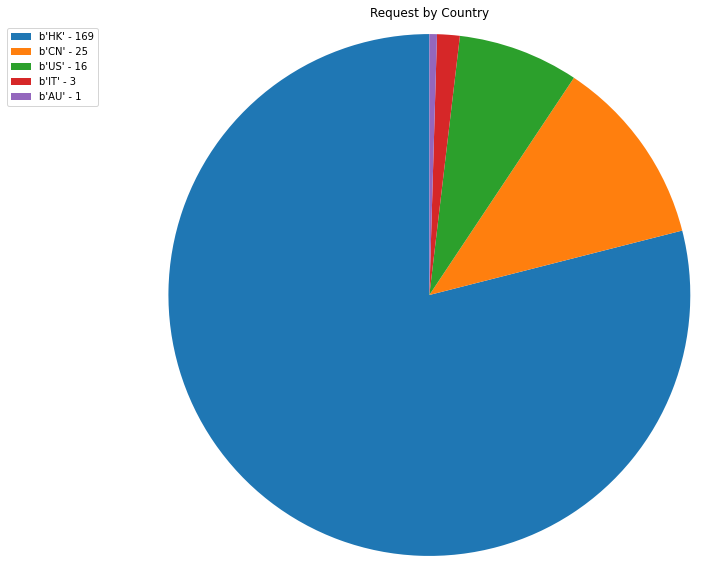

In [36]:
# Plot the data in pie chart
label = np.char.array(counrty_counts.index) #x
data = np.array(counrty_counts.to_list()) #y
amount = counrty_counts.to_list()

plt.rcParams["figure.figsize"] = (15,10)

patches, texts = plt.pie(data, startangle=90, radius=1.2)
labels = ['{0} - {1:1.0f}'.format(i,j) for i,j in zip(label, amount)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.title("Request by Country")
plt.show()

In [37]:
# List the top 3 requests
counrty_counts[:3]

HK    169
CN     25
US     16
Name: Regions, dtype: int64

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

In [38]:
# Using for loop to get the city of the ip in a list
city_list = list()
for ip_address in client_ip:
    city_list.append(DbIpCity.get(ip_address, api_key = 'free').city)


In [39]:
city_data = pd.DataFrame(city_list, columns = ["City"])
city_counts = city_data["City"].value_counts()
city_counts

Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
Quarry Bay                              1
Sydney                                  1
San Francisco (Financial District)      1
Mountain View                           1
Hangzhou                                1
Name: City, dtype: int64

In [40]:
len(city_counts)

11

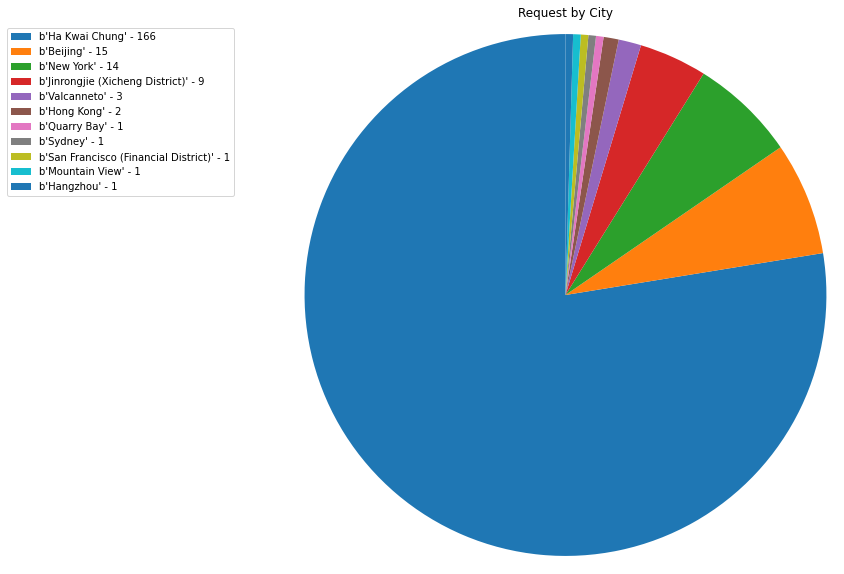

In [41]:
# Plot the data in pie chart
label = np.char.array(city_counts.index) #x
data = np.array(city_counts.to_list()) #y
amount = city_counts.to_list()

plt.rcParams["figure.figsize"] = (15,10)

patches, texts = plt.pie(data, startangle=90, radius=1.2)
labels = ['{0} - {1:1.0f}'.format(i,j) for i,j in zip(label, amount)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

plt.title("Request by City")
plt.show()

In [178]:
city_counts[:3]

Ha Kwai Chung    166
Beijing           15
New York          14
Name: City, dtype: int64

# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [42]:
# write your import and necessary web crawling libary here
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import re

### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [182]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])

In [43]:
import pandas as pd
# the crawling information will be stored in pandas dataframe and then save as csv
# below you are required to use the parse_name method to crawl the professor's full name and title
# The column name must be same as the provided professor-list.csv

stafflist_url = "https://www.deakin.edu.au/information-technology/staff-listing"

# Open connecting and grab page
uClient = uReq(stafflist_url)
page_html = uClient.read()
uClient.close() # Close the client

In [44]:
# Html parser
page_soup = soup(page_html, "html.parser")

In [45]:
# Test if the page is correct
page_soup.h1

<h1>Staff listing</h1>

In [46]:
# Grab professors name
professors = page_soup.findAll("td", {"headers":"table09355r1c1"})

In [47]:
# Test the first one
professors[0]

<td headers="table09355r1c1"><a href="https://www.deakin.edu.au/about-deakin/people/lynn-batten" target="_blank">Emeritus Professor Lynn Batten</a></td>

In [48]:
# Create loop to remove information between <> based on regular expressions

staffs_name = list()
for staffs in professors:
    professor_info = str(staffs)
    staffs_name.append(re.sub('<.*?>', '', professor_info))

In [49]:
name_list = list()
for info in staffs_name:
    name_list.append(info.split(" "))


# Remove staffs who are not professors
professor_lists = list()
for staff in name_list:
    if staff[0] == "Professor" or staff[1] == "Professor":
        professor_lists.append(staff)

professor_lists[0]

['Emeritus', 'Professor', 'Lynn', 'Batten']

In [50]:
# Create 3 lists. One is name and another is the title for the name. The last one is the University name.
names = list()
title = list()
for item in professor_lists:
    names.append(item[-2]+" "+item[-1])
    if len(item) == 3:
        title.append(item[0])
    else:
        title.append(item[0]+ " " +item[1])

University = ["Deakin University"] * len(names)

In [51]:
# Read CSV file 
professor_name_list = pd.read_csv("Professor-name-list.csv")
professor_name_list

,Name,Title,University


In [52]:
# Append lists to dataframe
professor_name_list['Name'] = names
professor_name_list['Title'] = title
professor_name_list['University'] = University
professor_name_list


,Name,Title,University
0,Lynn Batten,Emeritus Professor,Deakin University
1,Andrzej Goscinski,Emeritus Professor,Deakin University
2,Jemal Abawajy,Professor,Deakin University
3,Maia Angelova,Professor,Deakin University
4,Gleb Beliakov,Professor,Deakin University
5,Terry Caelli,Professor,Deakin University
6,Jinho Choi,Professor,Deakin University
7,Chang-Tsun Li,Professor,Deakin University
8,Robin Doss,Professor,Deakin University
9,Peter Eklund,Professor,Deakin University


In [53]:
# Export as CSV file
professor_name_list.to_csv("Professor-name-list-Updated.csv", index = False)

## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 

<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [ ]:
# search the google scholar for all professors to obtain their citations_all, h-index_all, i10_all, citation_since2016
# h-index-2016 and i10_since2016. Save the results as csv and must having all the professors name, title and all 6 citation information.
# if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na"
# you are requests to use loops and Conditional Statements to finish this task (eg: while / for, if...), failed to use loop
# and conditional statements will occur 0 mark.
# hint: sometimes, to render the google scholar page, you need to wait for the brower for few seconds, you could use "from time import sleep"
# to have sleep(5) as the wait action for waiting 5 seconds.  
# The column name must be same as the provided professor-citation-information.csv 
# write your code for this part as below:



In [54]:
Prof_FN_LN =  list()
for prof in names:
    Prof_FN_LN.append(prof.split(" "))
Prof_FN_LN

[['Lynn', 'Batten'],
 ['Andrzej', 'Goscinski'],
 ['Jemal', 'Abawajy'],
 ['Maia', 'Angelova'],
 ['Gleb', 'Beliakov'],
 ['Terry', 'Caelli'],
 ['Jinho', 'Choi'],
 ['Chang-Tsun', 'Li'],
 ['Robin', 'Doss'],
 ['Peter', 'Eklund'],
 ['Seng', 'Loke'],
 ['Antonio', 'Robles-Kelly'],
 ['Jean-Guy', 'Schneider'],
 ['Yong', 'Xiang'],
 ['John', 'Yearwood'],
 ['Arkady', 'Zaslavsky'],
 ['Mohamed', 'Abdelrazek'],
 ['Andrew', 'Cain'],
 ['Richard', 'Dazeley'],
 ['Guangyan', 'Huang'],
 ['Gang', 'Li'],
 ['Jianxin', 'Li'],
 ['Xiao', 'Liu'],
 ['Vicky', 'Mak'],
 ['Tim', 'Wilkin'],
 ['Abid', 'Adam'],
 ['Catherine', 'Buhler'],
 ['Eshan', 'Dissanayake'],
 ['Patrick', 'Fair'],
 ['David', 'Fairman'],
 ['Mark', 'Fitzgerald'],
 ['Praveen', 'Gauravaram'],
 ['Nigel', 'Hedges'],
 ['Darren', 'Kane'],
 ['Len', 'Kleinman'],
 ['James', 'Kotsias'],
 ['Berin', 'Lautenbach'],
 ['Phillip', 'Magness'],
 ['William', 'Moran'],
 ['Zahir', 'Quettawala'],
 ['Jamie', 'Rossato'],
 ['Chadi', 'Saliby'],
 ['Malcolm', 'Shore'],
 ['EJ', 'Wis

In [55]:
# Set the URL format which is first name + last name + deakin in search query
scholar_url_template = "https://scholar.google.com/citations?hl=zh-CN&view_op=search_authors&mauthors={FN}+{LN}+deakin&btnG="

In [56]:
# Create List to contain professors with publications
YoN_list = list()

In [57]:
#Define function to filter professors without publications in Google Scholar
def check_publications(FN, LN):
    prof_url = scholar_url_template.format(FN = FN, LN = LN) # Set format
    prof_client = uReq(prof_url)   # Open connecting and grab page
    prof_html = prof_client.read()
    prof_client.close
    prof_info_soup = soup(prof_html, "html.parser") # Html parser
    if prof_info_soup.find_all("div", class_ = "gs_med"): # If no result in google scholar this will be true
        return("No Publication")
    else:
        return("Found Publication")
    

In [58]:
check_publications("gang", "li") # Check if this function works properly by Professor Gang Li

'Found Publication'

In [59]:
# Collect all the publication states of professors from the list
Publication_States = [check_publications(item[0], item[1]) for item in Prof_FN_LN]
#Publication_States

In [60]:
# Merge the list with the name of the professors
Professor_Publication_Check = list(zip(Prof_FN_LN, Publication_States))
Professor_Publication_Check

[(['Lynn', 'Batten'], 'Found Publication'),
 (['Andrzej', 'Goscinski'], 'No Publication'),
 (['Jemal', 'Abawajy'], 'No Publication'),
 (['Maia', 'Angelova'], 'Found Publication'),
 (['Gleb', 'Beliakov'], 'Found Publication'),
 (['Terry', 'Caelli'], 'Found Publication'),
 (['Jinho', 'Choi'], 'Found Publication'),
 (['Chang-Tsun', 'Li'], 'Found Publication'),
 (['Robin', 'Doss'], 'No Publication'),
 (['Peter', 'Eklund'], 'Found Publication'),
 (['Seng', 'Loke'], 'Found Publication'),
 (['Antonio', 'Robles-Kelly'], 'Found Publication'),
 (['Jean-Guy', 'Schneider'], 'Found Publication'),
 (['Yong', 'Xiang'], 'Found Publication'),
 (['John', 'Yearwood'], 'Found Publication'),
 (['Arkady', 'Zaslavsky'], 'Found Publication'),
 (['Mohamed', 'Abdelrazek'], 'Found Publication'),
 (['Andrew', 'Cain'], 'Found Publication'),
 (['Richard', 'Dazeley'], 'Found Publication'),
 (['Guangyan', 'Huang'], 'Found Publication'),
 (['Gang', 'Li'], 'Found Publication'),
 (['Jianxin', 'Li'], 'Found Publication')

In [61]:
# Remove Professors from the list without publications
Professor_Publication = [item for item in Professor_Publication_Check if item[1] != 'No Publication']
Professor_Publication

[(['Lynn', 'Batten'], 'Found Publication'),
 (['Maia', 'Angelova'], 'Found Publication'),
 (['Gleb', 'Beliakov'], 'Found Publication'),
 (['Terry', 'Caelli'], 'Found Publication'),
 (['Jinho', 'Choi'], 'Found Publication'),
 (['Chang-Tsun', 'Li'], 'Found Publication'),
 (['Peter', 'Eklund'], 'Found Publication'),
 (['Seng', 'Loke'], 'Found Publication'),
 (['Antonio', 'Robles-Kelly'], 'Found Publication'),
 (['Jean-Guy', 'Schneider'], 'Found Publication'),
 (['Yong', 'Xiang'], 'Found Publication'),
 (['John', 'Yearwood'], 'Found Publication'),
 (['Arkady', 'Zaslavsky'], 'Found Publication'),
 (['Mohamed', 'Abdelrazek'], 'Found Publication'),
 (['Andrew', 'Cain'], 'Found Publication'),
 (['Richard', 'Dazeley'], 'Found Publication'),
 (['Guangyan', 'Huang'], 'Found Publication'),
 (['Gang', 'Li'], 'Found Publication'),
 (['Jianxin', 'Li'], 'Found Publication'),
 (['Xiao', 'Liu'], 'Found Publication'),
 (['Vicky', 'Mak'], 'Found Publication'),
 (['Tim', 'Wilkin'], 'Found Publication')]

In [62]:
# Save only the name
Professor = list()
for item in Professor_Publication:
    Professor.append(item[0])
Professor

[['Lynn', 'Batten'],
 ['Maia', 'Angelova'],
 ['Gleb', 'Beliakov'],
 ['Terry', 'Caelli'],
 ['Jinho', 'Choi'],
 ['Chang-Tsun', 'Li'],
 ['Peter', 'Eklund'],
 ['Seng', 'Loke'],
 ['Antonio', 'Robles-Kelly'],
 ['Jean-Guy', 'Schneider'],
 ['Yong', 'Xiang'],
 ['John', 'Yearwood'],
 ['Arkady', 'Zaslavsky'],
 ['Mohamed', 'Abdelrazek'],
 ['Andrew', 'Cain'],
 ['Richard', 'Dazeley'],
 ['Guangyan', 'Huang'],
 ['Gang', 'Li'],
 ['Jianxin', 'Li'],
 ['Xiao', 'Liu'],
 ['Vicky', 'Mak'],
 ['Tim', 'Wilkin']]

In [63]:
#Define function to crawling professor citation page if the professor is in google scholar
def get_url_link(FN, LN):
    scholar_url = scholar_url_template.format(FN = FN, LN = LN) # Set format
    SCClient = uReq(scholar_url)  # Open connecting and grab page
    SC_html = SCClient.read()
    SCClient.close()
    page_Sch_soup = soup(SC_html, "html.parser")  # Html Parser
    all_info = page_Sch_soup.find_all("div", class_ = "gs_ai_t") # Find info from class 
    return((all_info[0].h3.a)['href']) # Return the href link 
            

In [64]:
# Test by Professor Xiao Liu
get_url_link("Jinho", "Choi")

'/citations?hl=zh-CN&user=QzFia5YAAAAJ'

In [65]:
# Set loop to get the citation link of all professors
citation_link_part =  [get_url_link(item[0], item[1]) for item in Professor]
citation_link_part

['/citations?hl=zh-CN&user=Tmg0T9sAAAAJ',
 '/citations?hl=zh-CN&user=CCF7GZoAAAAJ',
 '/citations?hl=zh-CN&user=_plRpWEAAAAJ',
 '/citations?hl=zh-CN&user=E9ZX2lgAAAAJ',
 '/citations?hl=zh-CN&user=QzFia5YAAAAJ',
 '/citations?hl=zh-CN&user=nzLXktMAAAAJ',
 '/citations?hl=zh-CN&user=oE1fk_gAAAAJ',
 '/citations?hl=zh-CN&user=ZbdN-0AAAAAJ',
 '/citations?hl=zh-CN&user=y5249-IAAAAJ',
 '/citations?hl=zh-CN&user=7ZrNsYEAAAAJ',
 '/citations?hl=zh-CN&user=W5VJ07UAAAAJ',
 '/citations?hl=zh-CN&user=h4HjI2UAAAAJ',
 '/citations?hl=zh-CN&user=sTAoZeUAAAAJ',
 '/citations?hl=zh-CN&user=ybnQkasAAAAJ',
 '/citations?hl=zh-CN&user=Re6GgdcAAAAJ',
 '/citations?hl=zh-CN&user=Tp8Sx6AAAAAJ',
 '/citations?hl=zh-CN&user=zeAIa-8AAAAJ',
 '/citations?hl=zh-CN&user=dqwjm-0AAAAJ',
 '/citations?hl=zh-CN&user=WenZ4JUAAAAJ',
 '/citations?hl=zh-CN&user=HMEuyCAAAAAJ',
 '/citations?hl=zh-CN&user=KAiJydoAAAAJ',
 '/citations?hl=zh-CN&user=leo8TPYAAAAJ']

In [66]:
# Set the url format of the citation page of professors
cit_url_template = "https://scholar.google.com{LINK}"

In [78]:
# Define function to get the index and amount of citation
def get_cit_index(link):
    cit_url = cit_url_template.format(LINK = link) # Set format
    cit_client = uReq(cit_url)   # Open connecting and grab page
    cit_html = cit_client.read()
    cit_client.close
    cit_soup = soup(cit_html, "html.parser")  # Html Parser
    cit_data = cit_soup.find_all("td", class_ = "gsc_rsb_std") # Find info from class
    cit_data_table = list()
    for i in cit_data:
        cit_data_table.append(re.sub('<.*?>','', str(i)))
    return(cit_data_table)


In [81]:
citation_index = [get_cit_index(i) for i in citation_link_part]
citation_index

[['2528', '1172', '23', '16', '45', '21'],
 ['680', '397', '15', '11', '21', '14'],
 ['8173', '4632', '42', '32', '135', '86'],
 ['8662', '1472', '51', '20', '176', '36'],
 ['7814', '5023', '37', '29', '167', '95'],
 ['4341', '2336', '33', '21', '104', '65'],
 ['3962', '778', '34', '14', '72', '23'],
 ['7179', '2907', '38', '21', '126', '50'],
 ['3655', '1534', '24', '15', '62', '27'],
 ['1812', '643', '24', '15', '48', '21'],
 ['6306', '4969', '40', '35', '118', '95'],
 ['3786', '1991', '32', '23', '92', '45'],
 ['14930', '8330', '50', '33', '177', '80'],
 ['1856', '1256', '16', '15', '27', '23'],
 ['289', '192', '10', '8', '11', '8'],
 ['1470', '948', '16', '13', '24', '15'],
 ['1128', '809', '20', '18', '28', '23'],
 ['4111', '2821', '28', '24', '88', '60'],
 ['1465', '1086', '21', '18', '38', '31'],
 ['3219', '1749', '26', '20', '52', '42'],
 ['385', '227', '11', '8', '14', '6'],
 ['387', '310', '10', '10', '11', '10']]

In [82]:
# Set column header
column_cit = ["Total_citation","Citation_since_2016",
              "Total_h_index", "h_index_since_2016",
              "Total_i10_index", "i10_index_since_2016"]
# Print dataframe
cit_df = pd.DataFrame(citation_index, columns = column_cit)
cit_df

,Total citation,Citation since 2016,Total h index,h index since 2016,Total i10 index,i10 index since 2016
0,2528,1172,23,16,45,21
1,680,397,15,11,21,14
2,8173,4632,42,32,135,86
3,8662,1472,51,20,176,36
4,7814,5023,37,29,167,95
5,4341,2336,33,21,104,65
6,3962,778,34,14,72,23
7,7179,2907,38,21,126,50
8,3655,1534,24,15,62,27
9,1812,643,24,15,48,21


In [121]:
# Define function to get the amount of citations every year until 2020
def get_cit_index(link):
    cit_url = cit_url_template.format(LINK = link) # Set format
    cit_client = uReq(cit_url)   # Open connecting and grab page
    cit_html = cit_client.read()
    cit_client.close
    cit_soup = soup(cit_html, "html.parser")
    cit_year = cit_soup.find_all("span", class_ = "gsc_g_t") # Get the year of the citation
    cit_num = cit_soup.find_all("span", class_ = "gsc_g_al") # Get the amount of citation
    cit_year_list = list()
    cit_num_list = list()
    for item in cit_year:
        cit_year_list.append(re.sub('<.*?>','', str(item)))
    for item in cit_num:
        cit_num_list.append(re.sub('<.*?>','', str(item)))
    cit_num_per_year = list(zip(cit_year_list,cit_num_list))
    # filter the citation amount between 2014 and 2020 for prediction purpose 
    cit_npe = [item for item in cit_num_per_year if int(item[0]) > 2013 and int(item[0]) < 2021]
    cit_ny_df = (pd.DataFrame(cit_npe)).T  # Rotate the dataframe for 90 degrees
    new_header = cit_ny_df.iloc[0]         # Set the first column to be the header of dataframe
    cit_n_y_df = cit_ny_df[1:]
    cit_n_y_df.columns = new_header
    return(cit_n_y_df)

In [122]:
# Test the citation number and year
get_cit_index("/citations?hl=zh-CN&user=HMEuyCAAAAAJ")

,2014,2015,2016,2017,2018,2019,2020
1,378,363,351,302,348,341,309


In [123]:
# Loop to get all the dataframes
get_cit_idx = [get_cit_index(link) for link in citation_link_part]

In [124]:
# Concat all dataframes
citation_number_df = pd.concat(get_cit_idx, axis = 0, ignore_index = True)

In [125]:
citation_number_df

,2014,2015,2016,2017,2018,2019,2020
0,200,156,191,211,238,233,251
1,38,49,51,54,72,94,90
2,601,682,883,804,897,900,899
3,315,319,305,321,278,258,251
4,318,363,470,833,1043,1182,1176
5,274,346,394,386,442,471,475
6,181,198,156,177,132,143,130
7,517,575,593,576,575,519,494
8,330,312,340,287,266,254,299
9,73,120,123,114,125,103,137


In [149]:
# Get the first and second column of the citation dataframe which are name and title
Professor_Names = list()
for name in Professor:
    Professor_Names.append(name[0]+" "+name[1])
Professor_Names

['Lynn Batten',
 'Maia Angelova',
 'Gleb Beliakov',
 'Terry Caelli',
 'Jinho Choi',
 'Chang-Tsun Li',
 'Peter Eklund',
 'Seng Loke',
 'Antonio Robles-Kelly',
 'Jean-Guy Schneider',
 'Yong Xiang',
 'John Yearwood',
 'Arkady Zaslavsky',
 'Mohamed Abdelrazek',
 'Andrew Cain',
 'Richard Dazeley',
 'Guangyan Huang',
 'Gang Li',
 'Jianxin Li',
 'Xiao Liu',
 'Vicky Mak',
 'Tim Wilkin']

In [165]:
# Get the list of professors's title and zip to a new list
P_T_df = professor_name_list.loc[professor_name_list.Name.isin(Professor_Names)]
Professor_Title = P_T_df["Title"].to_list()
Professor_Title

Prof_N_T = list(zip(Professor_Names, Professor_Title))

In [167]:
# Prepare the name and title part of the dataframe
Professor_df_cit = pd.DataFrame(Prof_N_T, columns = ["Name", "Title"])
Professor_df_cit

,Name,Title
0,Lynn Batten,Emeritus Professor
1,Maia Angelova,Professor
2,Gleb Beliakov,Professor
3,Terry Caelli,Professor
4,Jinho Choi,Professor
5,Chang-Tsun Li,Professor
6,Peter Eklund,Professor
7,Seng Loke,Professor
8,Antonio Robles-Kelly,Professor
9,Jean-Guy Schneider,Professor


In [168]:
# Combine all the dataframes to One large dataframe with professors citation information
Professor_Citation_Info_df = pd.concat([Professor_df_cit, cit_df, citation_number_df], axis = 1, join = 'inner')

In [169]:
Professor_Citation_Info_df

,Name,Title,Total citation,Citation since 2016,Total h index,h index since 2016,Total i10 index,i10 index since 2016,2014,2015,2016,2017,2018,2019,2020
0,Lynn Batten,Emeritus Professor,2528,1172,23,16,45,21,200,156,191,211,238,233,251
1,Maia Angelova,Professor,680,397,15,11,21,14,38,49,51,54,72,94,90
2,Gleb Beliakov,Professor,8173,4632,42,32,135,86,601,682,883,804,897,900,899
3,Terry Caelli,Professor,8662,1472,51,20,176,36,315,319,305,321,278,258,251
4,Jinho Choi,Professor,7814,5023,37,29,167,95,318,363,470,833,1043,1182,1176
5,Chang-Tsun Li,Professor,4341,2336,33,21,104,65,274,346,394,386,442,471,475
6,Peter Eklund,Professor,3962,778,34,14,72,23,181,198,156,177,132,143,130
7,Seng Loke,Professor,7179,2907,38,21,126,50,517,575,593,576,575,519,494
8,Antonio Robles-Kelly,Professor,3655,1534,24,15,62,27,330,312,340,287,266,254,299
9,Jean-Guy Schneider,Professor,1812,643,24,15,48,21,73,120,123,114,125,103,137


In [173]:
Professor_Citation_Info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  22 non-null     object
 1   Title                 22 non-null     object
 2   Total citation        22 non-null     object
 3   Citation since 2016   22 non-null     object
 4   Total h index         22 non-null     object
 5   h index since 2016    22 non-null     object
 6   Total i10 index       22 non-null     object
 7   i10 index since 2016  22 non-null     object
 8   2014                  22 non-null     object
 9   2015                  22 non-null     object
 10  2016                  22 non-null     object
 11  2017                  22 non-null     object
 12  2018                  22 non-null     object
 13  2019                  22 non-null     object
 14  2020                  22 non-null     object
dtypes: object(15)
memory usage: 2.7+ KB


In [170]:
# Save as csv file
Professor_Citation_Info_df.to_csv("Professor-Citation-list-Updated.csv", index = False)

### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [176]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)

Total_cit = Professor_Citation_Info_df["Total citation"].apply(pd.to_numeric)
max_idx = Total_cit.idxmax() # Get the index
print("The professor who has the most citation is:", Professor_Citation_Info_df.iloc[max_idx, 0])


The professor who has the most citation is: Arkady Zaslavsky


### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)
</div>


<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [183]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)

# Convert data to int
Professor_Citation_Info_df["i10 index since 2016"] = pd.to_numeric(Professor_Citation_Info_df["i10 index since 2016"])
row_data = Professor_Citation_Info_df[(Professor_Citation_Info_df["Title"] == "Associate Professor")]
row_data_max = row_data[row_data["i10 index since 2016"] == row_data["i10 index since 2016"].max()]
row_data_max

,Name,Title,Total citation,Citation since 2016,Total h index,h index since 2016,Total i10 index,i10 index since 2016,2014,2015,2016,2017,2018,2019,2020
17,Gang Li,Associate Professor,4111,2821,28,24,88,60,250,288,338,382,444,579,834


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out all the professors name who has the citations_since2016 > 2500 (please remove those professor who does not have google scholar page)
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [185]:
# find out all the professors name who has the citations_since2016 > 2500

Professor_Citation_Info_df["Citation since 2016"] = pd.to_numeric(Professor_Citation_Info_df["Citation since 2016"])
prof_cit_2500 = Professor_Citation_Info_df[(Professor_Citation_Info_df["Citation since 2016"] > 2500)]
prof_cit_2500["Name"]

2        Gleb Beliakov
4           Jinho Choi
7            Seng Loke
10          Yong Xiang
12    Arkady Zaslavsky
17             Gang Li
Name: Name, dtype: object

Predict Professor Li Gang's 2021 citation based on several models

In [214]:
# Import packages

import os
import datetime
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense

1. Time series forcasting with Univariate CNN Models.

In [250]:
# Create dataset for training and prediction
data_set_CNN = (pd.to_numeric(row_data_max.iloc[0,8:])).to_list()
data_set_CNN

[250, 288, 338, 382, 444, 579, 834]

In [202]:
# Data preparation
# Define Split_sequence function
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [231]:
# Define the step of the dataset and split
n_steps = 3
X, Y =  split_sequence(data_set_CNN, n_steps)

# Summarize the data
for i in range(len(X)):
	print(X[i], Y[i])

[250 288 338] 382
[288 338 382] 444
[338 382 444] 579
[382 444 579] 834


In [232]:
# Define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (n_steps,1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [233]:
# Reshape X to add a feature feature so the imput shape could be [sample, step, feature]

X = X.reshape((X.shape[0], X.shape[1], 1))

In [234]:
# Training model
model.fit(X, Y, epochs=1000, verbose=0)

In [235]:
# Using the model to predict Professor Li's 2021 citation
X_input = array([444,579,834])
X_input = X_input.reshape((1, n_steps, 1)) # Reshape the input to be 3 dim

Y_2021 = model.predict(X_input, verbose = 0)
Y_2021

array([[1112.1844]], dtype=float32)

In [238]:
print("It is expected that the citation for professor Li in 2021 will be approxmately:", int(Y_2021))

It is expected that the citation for professor Li in 2021 will be approxmately: 1112


In [251]:
# Plot line chart about the trend of citation
data_set_CNN.append(int(Y_2021))


In [255]:
year = datetime.datetime.today().year
date = [year - i for i in range(8)]
date = date[::-1]
date

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

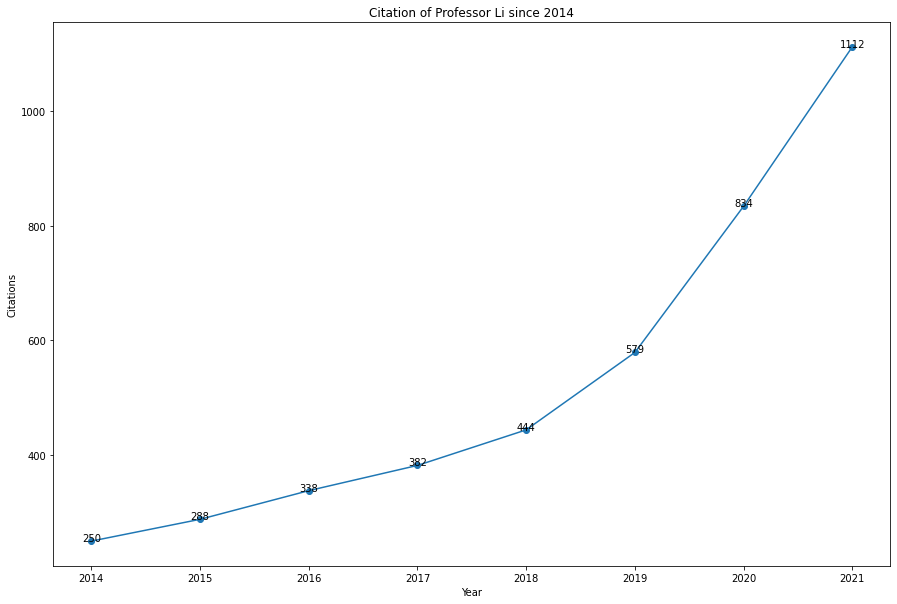

In [266]:
# Plot into line chart
plt.figure()
plt.plot(date,data_set_CNN)
plt.scatter(date,data_set_CNN)

plt.xlabel("Year")
plt.ylabel("Citations")
plt.title("Citation of Professor Li since 2014")

for i in range(len(data_set_CNN)):
    plt.annotate(data_set_CNN[i], (date[i],data_set_CNN[i]), ha='center')

plt.show()

In [19]:
# Save result as html
!jupyter nbconvert --to html CAZ_SIT742Task1.ipynb

[NbConvertApp] Converting notebook CAZ_SIT742Task1.ipynb to html
[NbConvertApp] Writing 995873 bytes to CAZ_SIT742Task1.html
